In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datos
data = pd.read_csv('processed_data.csv')

In [3]:
# Estadísticas descriptivas
print(data.describe())

             price    price_USD      storage          ram       Weight  \
count  1715.000000  1715.000000  1715.000000  1715.000000  1712.000000   
mean    381.338560   420.052589   271.286297     7.973178   195.212266   
std     334.142684   361.986094   207.263335     3.422996    24.714075   
min      49.000000    52.630000    32.000000     2.000000   135.000000   
25%     149.740000   167.890000   128.000000     6.000000   183.500000   
50%     249.990000   279.000000   256.000000     8.000000   193.250000   
75%     499.475000   551.145000   256.000000    12.000000   204.000000   
max    2179.460000  2361.660000  1000.000000    24.000000   627.000000   

       Display_Size          NFC       BATTERY         Year     Foldable  \
count   1715.000000  1715.000000   1715.000000  1715.000000  1715.000000   
mean       6.565038     0.917201   4657.909038  2022.050146     0.048397   
std        0.382489     0.275658    693.623964     1.427699     0.214665   
min        4.700000     0.000

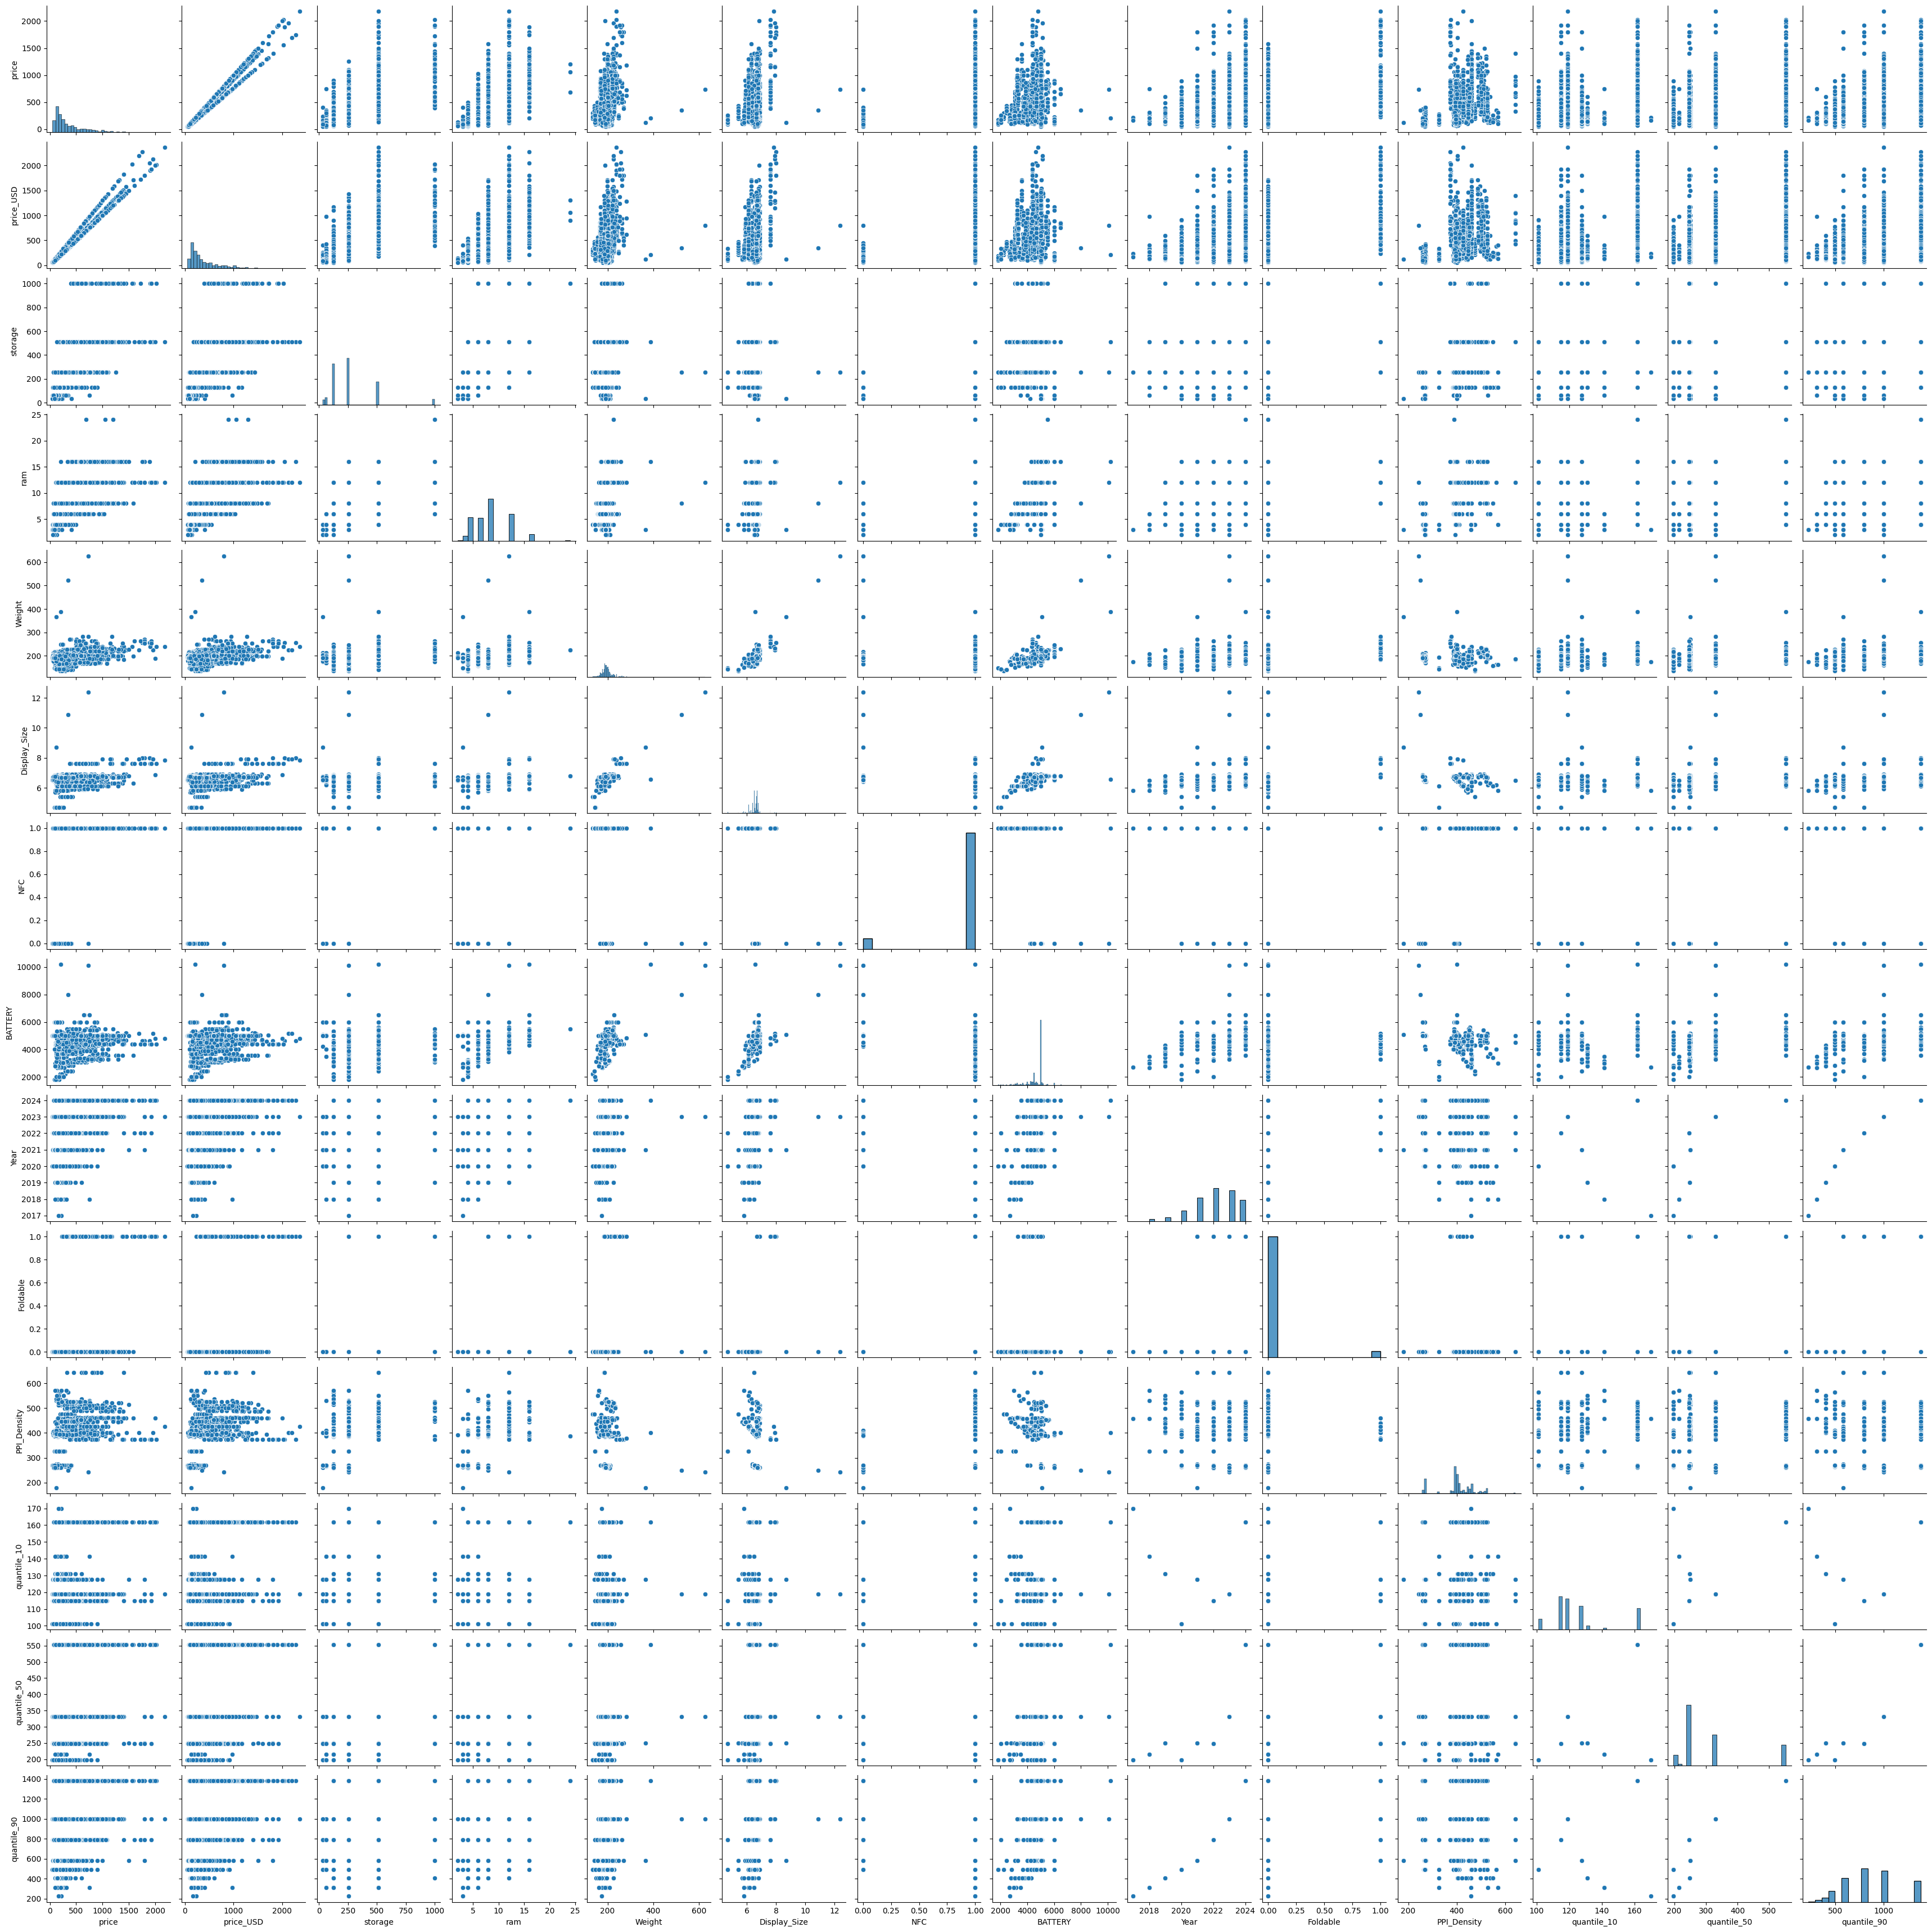

In [4]:
# Visualización de algunas variables
sns.pairplot(data)
plt.show()


In [5]:
# Identificación de valores faltantes
print(data.isnull().sum())

phone_brand           0
phone_model           0
store                 0
price                 0
currency              0
price_USD             0
storage               0
ram                   0
Launch                0
Dimensions            0
Weight                3
Display_Type          0
Display_Size          0
Display_Resolution    0
OS                    0
NFC                   0
USB                   0
BATTERY               0
Features_Sensors      0
Colors                0
Video                 0
Chipset               0
CPU                   0
GPU                   0
Year                  0
Foldable              0
PPI_Density           0
quantile_10           0
quantile_50           0
quantile_90           0
price_range           0
dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler

# Selecciona solo las columnas numéricas
numeric_columns = data.select_dtypes(include='number')

In [14]:
# Normalización de los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

In [19]:
# Convertimos los datos normalizados en un DataFrame con los nombres originales de las columnas
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

3. Análisis de Datos

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print(data.columns)


Index(['phone_brand', 'phone_model', 'store', 'price', 'currency', 'price_USD',
       'storage', 'ram', 'Launch', 'Dimensions', 'Weight', 'Display_Type',
       'Display_Size', 'Display_Resolution', 'OS', 'NFC', 'USB', 'BATTERY',
       'Features_Sensors', 'Colors', 'Video', 'Chipset', 'CPU', 'GPU', 'Year',
       'Foldable', 'PPI_Density', 'quantile_10', 'quantile_50', 'quantile_90',
       'price_range'],
      dtype='object')


In [24]:
# Separación de características y variable objetivo
X = scaled_data_df.drop('price', axis=1)  
y = data['price']  

In [25]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Aplicar regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predicción
y_pred = regressor.predict(X_test)


In [28]:
# Evaluación del modelo
print(f"R2 Score: {regressor.score(X_test, y_test)}")

R2 Score: 0.9734493999062992


4. Clustering

In [35]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 3 clústeres (puedes ajustar este valor)
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(data[['price_USD', 'ram']])

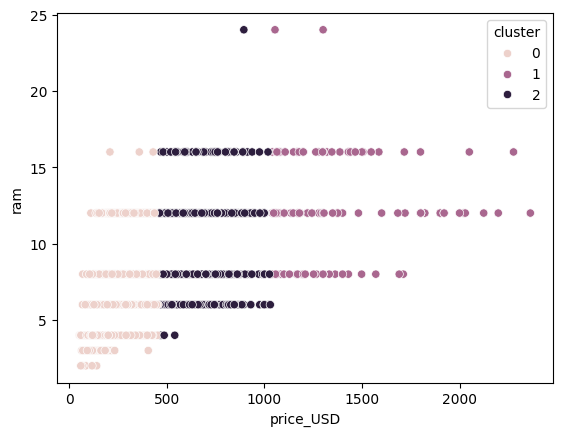

In [36]:
# Visualización de los clústeres usando 'price_USD' y 'ram'
sns.scatterplot(x='price_USD', y='ram', hue='cluster', data=data)
plt.show()

In [37]:
from sklearn.cluster import DBSCAN
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['cluster'] = dbscan.fit_predict(scaled_data_df)

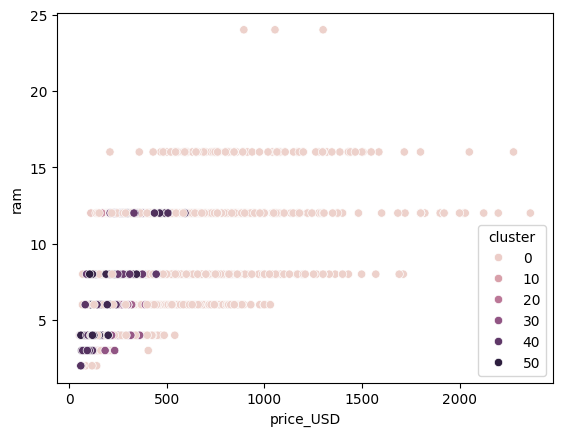

In [38]:
# Visualización de los clústeres
sns.scatterplot(x='price_USD', y='ram', hue='cluster', data=data)
plt.show()

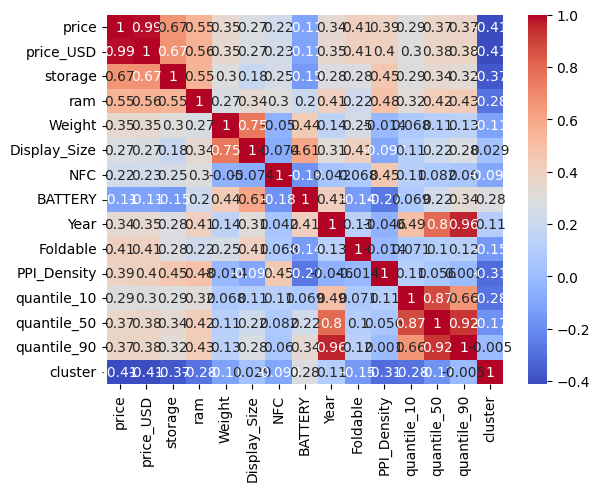

In [40]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Gráfico de calor para visualizar correlaciones
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()